# Decision Point Price Momentum Oscillator (PMO)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:dppmo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,99.499107,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500


In [4]:
df['ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close'].shift(1)) * 100
Custom_Smooth_Constant_35 = 2/35
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC
Date,,,,,,,
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000,-2.505929
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400,-1.956966
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400,-4.220454
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000,0.528769
2016-01-11,98.970001,99.059998,97.339996,98.529999,93.057869,49739400,1.619214


In [5]:
Average = df['ROC'][0:35].mean()
Average

-0.22123857166265515

In [6]:
df['35_Custom_EMA_ROC'] = (df['ROC'].shift(35)*Custom_Smooth_Constant_35)+(Average*(1-Custom_Smooth_Constant_35))
df.head(40)

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC
Date,,,,,,,,
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000,-2.505929,NaN
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400,-1.956966,NaN
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400,-4.220454,NaN
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000,0.528769,NaN
2016-01-11,98.970001,99.059998,97.339996,98.529999,93.057869,49739400,1.619214,NaN
2016-01-12,100.550003,100.690002,98.839996,99.959999,94.408447,49154200,1.451331,NaN
2016-01-13,100.320000,101.190002,97.300003,97.389999,91.981194,62439600,-2.571013,NaN
2016-01-14,97.959999,100.480003,95.739998,99.519997,93.992889,63170100,2.187072,NaN
2016-01-15,96.199997,97.709999,95.360001,97.129997,91.735634,79010000,-2.401517,NaN


In [7]:
df['35_Custom_EMA_ROC_10'] = df['35_Custom_EMA_ROC']*10
df.head(40)

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10
Date,,,,,,,,,
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000,-2.505929,NaN,NaN
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400,-1.956966,NaN,NaN
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400,-4.220454,NaN,NaN
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000,0.528769,NaN,NaN
2016-01-11,98.970001,99.059998,97.339996,98.529999,93.057869,49739400,1.619214,NaN,NaN
2016-01-12,100.550003,100.690002,98.839996,99.959999,94.408447,49154200,1.451331,NaN,NaN
2016-01-13,100.320000,101.190002,97.300003,97.389999,91.981194,62439600,-2.571013,NaN,NaN
2016-01-14,97.959999,100.480003,95.739998,99.519997,93.992889,63170100,2.187072,NaN,NaN
2016-01-15,96.199997,97.709999,95.360001,97.129997,91.735634,79010000,-2.401517,NaN,NaN


In [8]:
df = df.dropna()
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10
Date,,,,,,,,,
2016-02-25,96.050003,96.760002,95.250000,96.760002,91.882057,27582700,0.686781,-0.351792,-3.517923
2016-02-26,97.199997,98.019997,96.580002,96.910004,92.024490,28991100,0.155017,-0.320423,-3.204230
2016-02-29,96.860001,98.230003,96.650002,96.690002,91.815598,35216300,-0.226996,-0.449765,-4.497651
2016-03-01,97.650002,100.769997,97.419998,100.529999,95.461998,50407100,3.971438,-0.178381,-1.783810
2016-03-02,100.510002,100.889999,99.639999,100.750000,95.670914,33169600,0.218847,-0.116070,-1.160699
2016-03-03,100.580002,101.709999,100.449997,101.500000,96.383095,36955700,0.744407,-0.125663,-1.256631
2016-03-04,102.370003,103.750000,101.370003,103.010002,97.816986,46055100,1.487700,-0.355511,-3.555114
2016-03-07,102.389999,102.830002,100.959999,101.870003,96.734444,35828900,-1.106701,-0.083621,-0.836208
2016-03-08,100.779999,101.760002,100.400002,101.029999,95.936798,31561900,-0.824573,-0.345826,-3.458259


In [9]:
Custom_Smooth_Constant_20 = 2/20
Average2 = df['35_Custom_EMA_ROC_10'][0:20].mean()
df['20_Day_Custom_EMA'] = ((df['35_Custom_EMA_ROC_10'].shift(20)-Average2)*Custom_Smooth_Constant_20)+Average2
df

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,20_Day_Custom_EMA
Date,,,,,,,,,,
2016-02-25,96.050003,96.760002,95.250000,96.760002,91.882057,27582700,0.686781,-0.351792,-3.517923,NaN
2016-02-26,97.199997,98.019997,96.580002,96.910004,92.024490,28991100,0.155017,-0.320423,-3.204230,NaN
2016-02-29,96.860001,98.230003,96.650002,96.690002,91.815598,35216300,-0.226996,-0.449765,-4.497651,NaN
2016-03-01,97.650002,100.769997,97.419998,100.529999,95.461998,50407100,3.971438,-0.178381,-1.783810,NaN
2016-03-02,100.510002,100.889999,99.639999,100.750000,95.670914,33169600,0.218847,-0.116070,-1.160699,NaN
2016-03-03,100.580002,101.709999,100.449997,101.500000,96.383095,36955700,0.744407,-0.125663,-1.256631,NaN
2016-03-04,102.370003,103.750000,101.370003,103.010002,97.816986,46055100,1.487700,-0.355511,-3.555114,NaN
2016-03-07,102.389999,102.830002,100.959999,101.870003,96.734444,35828900,-1.106701,-0.083621,-0.836208,NaN
2016-03-08,100.779999,101.760002,100.400002,101.029999,95.936798,31561900,-0.824573,-0.345826,-3.458259,NaN


In [10]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,20_Day_Custom_EMA
Date,,,,,,,,,,
2016-03-24,105.470001,106.250000,104.889999,105.669998,100.342873,26133000,-0.433441,-0.095497,-0.954966,-2.490520
2016-03-28,106.000000,106.190002,105.059998,105.190002,99.887093,19411400,-0.454223,-0.162682,-1.626820,-2.459150
2016-03-29,104.889999,107.790001,104.879997,107.680000,102.251556,31190100,2.367136,-0.361213,-3.612130,-2.588492
2016-03-30,108.650002,110.419998,108.599998,109.559998,104.036758,45601100,1.745892,-0.148427,-1.484271,-2.317108
2016-03-31,109.720001,109.900002,108.879997,108.989998,103.495514,25888400,-0.520243,-0.209799,-2.097986,-2.254797


Text(0.5,0,'Date')

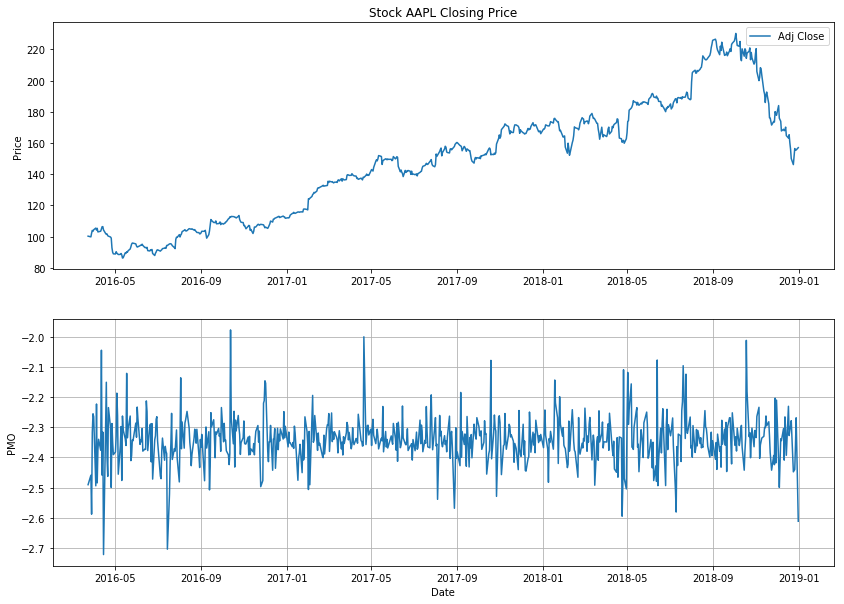

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['20_Day_Custom_EMA'], label='PMO')
#ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')